**Context:**   This project will be a walkthrough of a simple Logistic Regression model in an attempt to strategize a basic ad-targeting campaign for a social media network/website. One of our sponsor's advertisements seems to be particularly successful among our older, wealthier users but seemingly less-so with our younger ones. We'd like to implement an appropriate model so that we know who our target audience is for this specific advertisement, thus maximizing our click-through rate. We'd like to show younger users this ad with a lower probability than we show it to our older/wealthier users, and use that time/space to expose the younger users to ads that they are more likely to be interested in. 

   Our dataset contains some information about all of our users in the social network, including their User ID, Gender, Age, and Estimated Salary. The last column of the dataset is a vector of booleans describing whether or not each individual ended up clicking on the advertisement (0 = False, 1 = True). Let's import the relevant libraries, the dataset, and establish which variables are either dependent or independent. We'll continually print out any changes that we've made to the data at the bottom of our code cells.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('../input/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


If we wanted to determine the effect of more independent variables on the outcome (such as Gender), we would have to implement a Dimensionality Reduction aspect to the model because we can only describe so many dimensions visually. However, right now we are only worried about how the users' Age and Estimated Salary affect their decision to click or not click on the advertisement. To do this, we will extract the relevant vectors from our dataset: the independent variables (X) and the dependent variable (y). The following code segment describes the selection of the entire third and fourth columns for X, as well as the entire fifth column for y. Again, we'll print out our data in order to help visualize the model.

In [2]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

print(X[:3, :])
print('-'*15)
print(y[:3])

[[   19 19000]
 [   35 20000]
 [   26 43000]]
---------------
[0 0 0]


We now need to split our data into two sets: a training set for the machine to learn from, as well as a test set for the machine to execute on. This process is referred to as Cross Validation and we will be implementing SciKit Learn's appropriately named 'train_test_split' class to make it happen. Industry standard usually calls for a training set size of 70-80% so we'll split the two.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train[:3])
print('-'*15)
print(y_train[:3])
print('-'*15)
print(X_test[:3])
print('-'*15)
print(y_test[:3])

[[    44  39000]
 [    32 120000]
 [    38  50000]]
---------------
[0 1 0]
---------------
[[   30 87000]
 [   38 50000]
 [   35 75000]]
---------------
[0 0 0]


To get the most accurate results, a common tool within machine learning models is to apply Feature Scaling:
    "...a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step." - Wikipedia <https://en.wikipedia.org/wiki/Feature_scaling>. 
SciKit Learn, again, has a helpful library called StandardScaler that will quickly preprocess the data for us in this manner.

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
print(X_train[:3])
print('-'*15)
print(X_test[:3])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]]
---------------
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]]


Now we are ready to build our Logistic Regression Model. We create an object of the LogisticRegression() class and refer to it as our 'classifier' for obvious reasons. The random state variable simply allows us to all get the same outcome but can be changed to alter the results slightly. We then fit the classifier to the training set with the aptly named .fit() method so that it can understand the correlations between X and y. Lastly, we will test the classifier's predictive power on the test set. The Logistic Regression's .predict() method will give us a vector of predictions for our dataset, X_test.

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(X_test[:10])
print('-'*15)
print(y_pred[:10])

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]]
---------------
[0 0 0 0 0 0 0 1 0 1]


We can see from the first ten values for y_pred that only the eighth and tenth individuals within the index are predicted to click on the advertisement. If you do some quick mental math, you'll also notice that these are the only two pairs with a positive summation. We can start to make some inferences about the relationship now. As the value of these independent variables increases (Age and Estimated Salary), the more likely it is that a given user will click on the ad. This also gives us a clue into how the model is appropriating a binary outcome (will click or will not click) for each individual based on the sum of these scaled values. We can think of 0 as the center of our normal distribution and consider any value falling below that threshold (any negative value) as being assigned a '0' boolean value because the probability that they click on the advertisement is below 50%. The machine is essentially rounding up (True) or down (False) based on if the individual's probability of clicking is closer to 0% or 100%.

We can also compare our prediction vector (y_pred) to the actual observable values in y_test. We'll print out the first 20 values adjacent to each other to get a sneak-peek of how close our classifier came to a 100% prediction rate. When you run the cell below, you'll notice that there is only one mismatch between the two, thus our model has a 19/20 or 95% prediction rate for the first 20 samples! This is a great start, but we'll have to look at the rest of the data, as well.

In [7]:
print(y_pred[:20])
print(y_test[:20])

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]


Now that we've preprocessed the data, fit our classifier to the training set, and predicted the dependent values for our test set, we can use a Confusion Matrix to evaluate exactly how accurate our Logistic Regression model is. This function will compare the calculated results in our y_pred vector to the actual observed results in y_test to determine how similar they are. The more values that match, the higher the accuracy of the classifier. 

Note: If you are unfamiliar with the structure, the top-left and bottom-right quadrants will tell us how many predictions were correct - while the other two values indicate how many were in correct. We can divide the summation of those first two numbers by the total number of samples to give us a percentage of accuracy.

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


**Conclusion:  **This Confusion Matrix tells us that there were 89 correct predictions and 11 incorrect ones, meaning the model overall accomplished an 89% accuracy rating. This is very good and there are many ways to improve the model by parameter tuning and sample size increasing, but those topics are outside the scope of this project. Our next step is to create visualizations to compare the training set and the test set. As we've stated throughout this discussion, seeing our data and being able to visualize our work in front of us is imperative to understanding each step of the model. Charts and graphs will also help us explain our findings in layman's terms so that others can comprehend the insights that we've derived and they can implement our findings into their business plans. The Matplotlib library provides some excellent tools to create visualizations so let's do that now. We'll start by plotting the training set results amidst our classifier. Most of the code in the next cell is relatively straightforward but feel free to visit https://matplotlib.org/ for more detail.

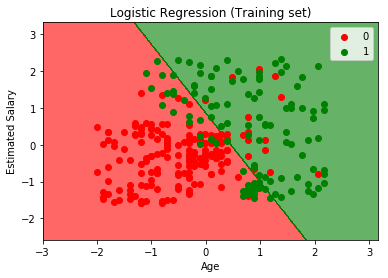

In [9]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

This graph helps us see the clear correlations between the dependent and independent variables. It is obvious that, as Age and Estimated Salary increase, each individual has a higher likelihood of being green (they will click on the ad). Intuitively, this graph makes a lot of sense because we can quickly tell that about 80-90% of the observations have been correctly identified. There will almost always be some degree of error - or at least there should be, otherwise our model is probably guilty of overfitting. Now let's map the test set results to visualize where our Confusion Matrix came from.

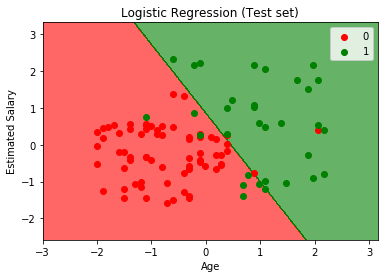

In [10]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


It's no surprise that this graph looks very similar to the last, but with fewer observations. We can literally count out the 11 mismatched individuals without even having to run the Confusion Matrix to determine the accuracy. When we look at both models together, we can actually see that there is a shape to this data that's becoming increasingly apparent as the number of observations increases. Notice that that the positive (or green) data points seem to be almost wrapping around the most crowded area of red dots, inferring that we can probably improve our model and projections by implementing a non-linear model (one with a classifier that isn't restricted to being a straight line). The best X-intercept is probably closer to 1 than it is to 2 (as shown in this model), and the y-intercept is likely between 2 and 3. But while there is always room for improvement, we can be satisfied with this model as our final product. Our accuracy is high, but not so high that we need to be suspicious of any overfitting. We can safely say that an increase in both Age and Estimated Salary will lead to a higher probability of clicking the advertisement. As new users sign-up for the website, we can use this model to quickly determine whether or not to expose them to this particular ad or choose another that is more relevant to their profile.